<a href="https://colab.research.google.com/github/wereign/aera-vera-keras-nathu-geras/blob/main/RNN_SineWave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

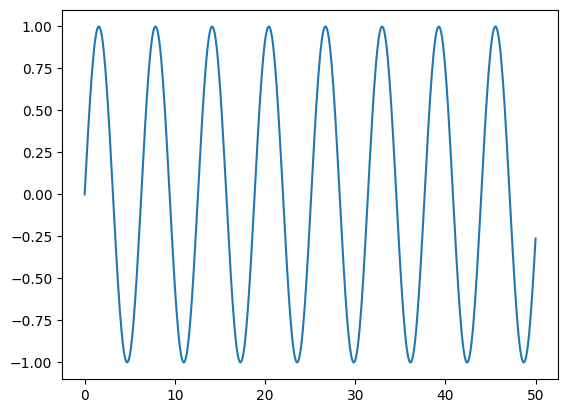

In [5]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [8]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [9]:
test_percent = 0.1 # 10 percent of the dataset will the test set

In [10]:
len(df) * test_percent

50.1

In [11]:
test_point = np.round(len(df) * test_percent)

In [12]:
test_point

50.0

In [13]:
test_index = int(len(df) - test_point)

In [14]:
train_set = df.iloc[:test_index]

In [16]:
test_set = df.iloc[test_index:]

Scaling the data
the label needs to be scaled too, since it's being fed into the network

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
scaler.fit(train_set)

MinMaxScaler()

In [20]:
scaled_train_set = scaler.transform(train_set)

In [21]:
scaled_test_set = scaler.transform(test_set)

In [26]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [43]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.preprocessing.sequence:

class TimeseriesGenerator(keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  
 |  Deprecated: `tf.keras.preprocessing.sequence.TimeseriesGenerator` does not
 |  operate on tensors and is not recommended for new code. Prefer using a
 |  `tf.data.Dataset` which provides a more efficient and flexible mechanism for
 |  batching, shuffling, and windowing input. See the
 |  [tf.data guide](https://www.tensorflow.org/guide/data) for more details.
 |  
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  
 |  Arguments:
 |      data: Indexable generator (such as li

In [56]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train_set,scaled_train_set,
                                length=length,batch_size=batch_size)

In [57]:
len(scaled_train_set)

451

In [58]:
len(generator)

449

In [59]:
X,y = generator[0]
print(X)
print()
print(y)

[[[0.49999912]
  [0.54991622]]]

[[0.59933458]]


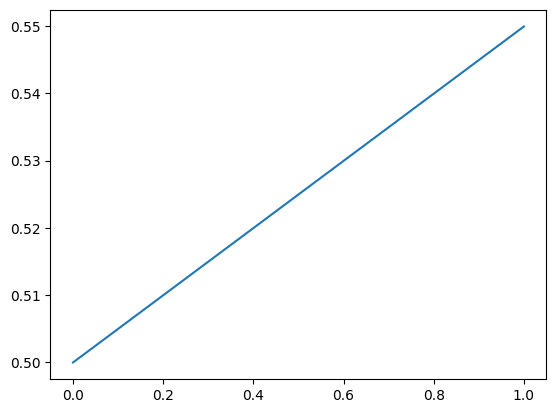

In [61]:
plt.plot(X[0])

In [62]:
# setting the length to a value that helps to properly capture the trend
length = 25
batch_size = 1

generator = TimeseriesGenerator(scaled_train_set,scaled_train_set,
                                length=length,batch_size=batch_size)

In [63]:
X,y = generator[0]

In [65]:
print(X)

[[[0.49999912]
  [0.54991622]
  [0.59933458]
  [0.64776041]
  [0.69470985]
  [0.73971381]
  [0.78232262]
  [0.82211054]
  [0.85868004]
  [0.89166571]
  [0.92073798]
  [0.94560637]
  [0.9660224 ]
  [0.98178208]
  [0.99272794]
  [0.99875061]
  [0.99978993]
  [0.9958355 ]
  [0.98692684]
  [0.97315296]
  [0.95465148]
  [0.93160726]
  [0.90425056]
  [0.87285471]
  [0.83773342]]]


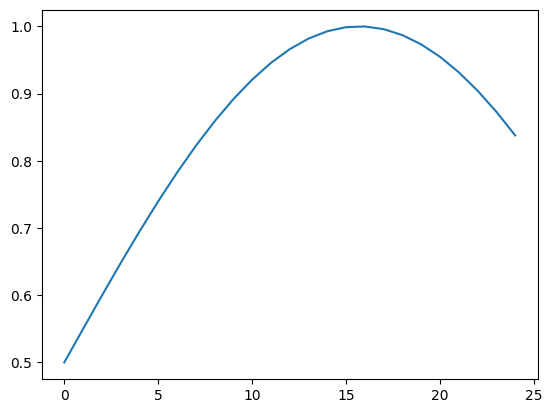

In [67]:
plt.plot(X[0])